In [1]:
%load_ext autoreload
%autoreload 2

import S4Mock_io
import matplotlib.pyplot as plt
import numpy as np
from  desitarget.targets import desi_mask, bgs_mask, mws_mask
import geometry
import healpy as hp

In [2]:
#load in filling factor 
#so can do correction 
#add to code to discount low pixels 

In [26]:
#open randoms
nside=32
randoms = S4Mock_io.read_desitargetrandoms(number=1)
randoms=geometry.bgs_mask_randoms(randoms)
target_pixel_density = geometry.targ_hpmap(randoms)

pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *2500
filling_factor = target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor

[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


In [3]:
nside=32
pixel_area = hp.nside2pixarea(nside,degrees=True)

In [4]:
mock = S4Mock_io.read_mxxl(small=False)

In [5]:
bright_mock = mock[(mock['APP_MAG'] <= 19.5952)]
faint_mock = mock[(mock['APP_MAG'] > 19.5952) & (mock['APP_MAG'] <= 20.003)]

In [6]:
bright_mock_pixel_density = geometry.targ_hpmap(bright_mock)
faint_mock_pixel_density = geometry.targ_hpmap(faint_mock)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


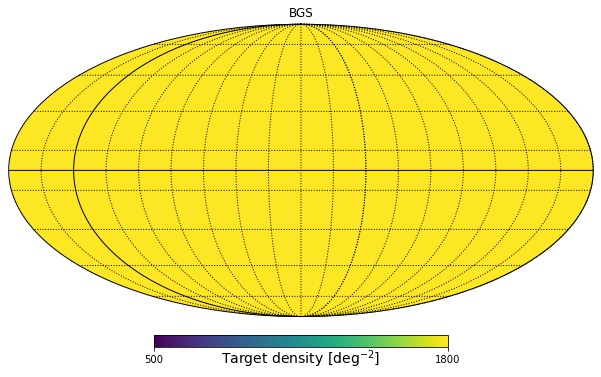

In [7]:
hp.mollview(bright_mock_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

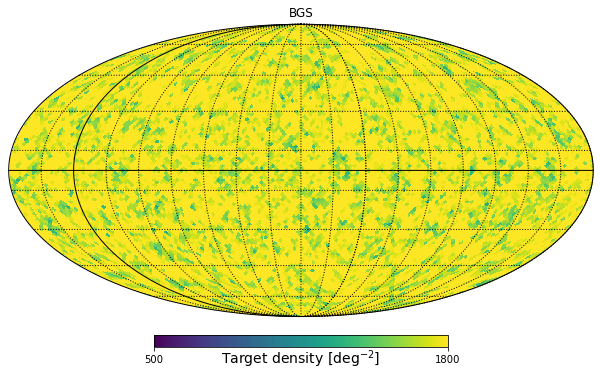

In [8]:
hp.mollview(faint_mock_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

In [9]:
bright_real = S4Mock_io.read_mainsurvey_targets_bright()
faint_real = S4Mock_io.read_mainsurvey_targets_faint()

Runtime of 0.146809 seconds after 0 pixels
Runtime of 5.475484 seconds after 20 pixels
Runtime of 10.052094 seconds after 40 pixels
Runtime of 14.926083 seconds after 60 pixels
Runtime of 18.696368 seconds after 80 pixels
Runtime of 23.372063 seconds after 100 pixels
Runtime of 29.889937 seconds after 120 pixels
Runtime of 33.832370 seconds after 140 pixels
Runtime of 38.348803 seconds after 160 pixels
Runtime of 43.515954 seconds after 180 pixels
Runtime of 48.465444 seconds after 200 pixels
Runtime of 52.785322 seconds after 220 pixels
Runtime of 55.285327 seconds after 240 pixels
Runtime of 59.158540 seconds after 260 pixels
Runtime of 63.137636 seconds after 280 pixels
Runtime of 69.433052 seconds after 300 pixels
Runtime of 74.245735 seconds after 320 pixels
Runtime of 78.510457 seconds after 340 pixels
Runtime of 81.889304 seconds after 360 pixels
Runtime of 84.552002 seconds after 380 pixels
Runtime of 87.330374 seconds after 400 pixels
Runtime of 93.481986 seconds after 420 pix

In [48]:
bright_real_pixel_density = geometry.targ_hpmap(bright_real,norm=corr_pixel_area,filling_factor=filling_factor)
faint_real_pixel_density = geometry.targ_hpmap(faint_real,norm=corr_pixel_area,filling_factor=filling_factor)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


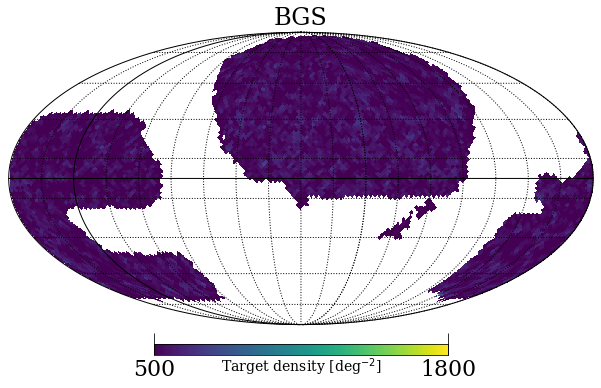

In [39]:
hp.mollview(faint_real_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

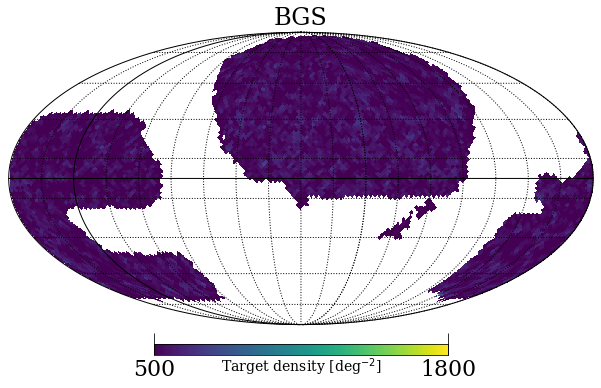

In [40]:
hp.mollview(faint_real_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

In [24]:
#bright_real_pixel_density = bright_real_pixel_density[~np.isnan(bright_real_pixel_density)]
#faint_real_pixel_density = faint_real_pixel_density[~np.isnan(faint_real_pixel_density)]

In [14]:
faint_real_pixel_density

array([1645., 2061., 1848., ..., 1649., 1784., 1731.])

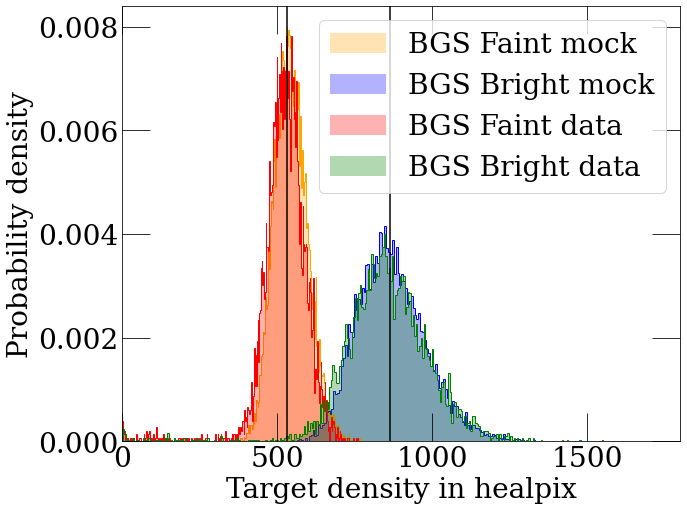

In [49]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_mock_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.3,color='orange',label='BGS Faint mock',density=True)
_ = plt.hist(bright_mock_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.3,color='blue',label='BGS Bright mock',density=True)
_ = plt.hist(faint_mock_pixel_density/pixel_area, bins=150,histtype='step',color='orange',density=True)
_ = plt.hist(bright_mock_pixel_density/pixel_area, bins=150,histtype='step',color='blue',density=True)
_ = plt.hist(faint_real_pixel_density, bins=300,histtype='bar',alpha=0.3,color='red',label='BGS Faint data',density=True)
_ = plt.hist(bright_real_pixel_density, bins=300,histtype='bar',alpha=0.3,color='green',label='BGS Bright data',density=True)
_ = plt.hist(faint_real_pixel_density, bins=300,histtype='step',color='red',density=True)
_ = plt.hist(bright_real_pixel_density, bins=300,histtype='step',color='green',density=True)
plt.axvline(x=533,color='black')
plt.axvline(x=864,color = 'black')


plt.xlabel('Target density in healpix')
plt.xlim(0,1800)
plt.ylabel('Probability density')
plt.legend()
plt.savefig('hists.png',bbox_inches='tight')

#scale to common area 